In [2]:
import os
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split


## Linear Regression 

In [4]:
ads = pd.read_csv("Advertising.csv")
ads.drop(["Unnamed: 0"], axis=1 , inplace=True)

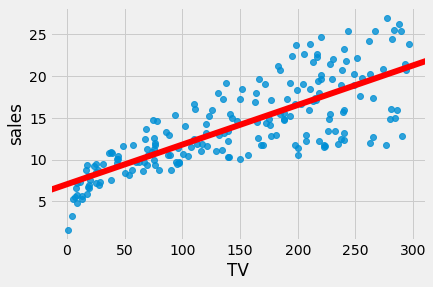

In [10]:
sns.regplot(x="TV", y="sales", data=ads, ci=None, line_kws={"color" : "red"})

C:\Users\svena\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


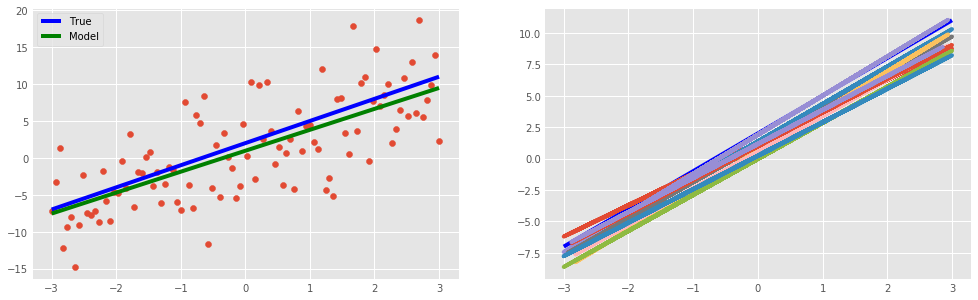

In [3]:
'''Simulating dataset to identify difference between true and modelled regression lines'''
# Setting up parameters
x = np.linspace(-3,3,100)
y = 2 + 3 * x + np.random.normal(0,5,len(x))
ytrue = 2 + 3 * x 

# Model and Prediction 
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
yhat = model.predict(x)

# Initialize potting 
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

x = x[:,1]
ax1.scatter(x,y)
ax1.plot(x,ytrue, color="blue")
ax1.plot(x,yhat, color="green")
ax1.legend(labels=["True","Model"])


ax2.plot(x,ytrue, color="blue")

# Bootstrapping
df = pd.DataFrame([x,y]).T
df.rename(columns={0:"x",1:"y"}, inplace=True)
yhat2 = list()

for iteration in range(10):
    sample = df.sample(frac=0.5)
    X = sample["x"]
    X = sm.add_constant(X)
    Y = sample["y"]
    model = sm.OLS(Y,X).fit()
    pred = model.predict(X)
    
    ax2.plot(X["x"],pred)
    yhat2.append(pred)

In [192]:
X = ads["TV"]
Y = ads["sales"]
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           1.47e-42
Time:                        10:23:52   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
ci_up, ci_down = 0.0475 + 2*0.003, 0.0475 - 2*0.003
print("Confidence intervals are +/- {0:.4},{1:.4}.".format(ci_up, ci_down))

Confidence intervals are +/- 0.0535,0.0415.


# Model accuracy 

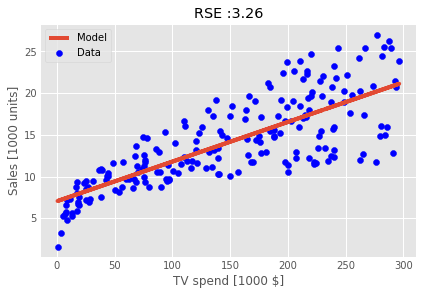

In [214]:
yhat = model.predict(X)
RSS = np.sum((Y-yhat)**2)
RSE = np.sqrt(1/(len(yhat)-2) * RSS)

plt.scatter(X["TV"],Y, color="blue")
plt.plot(X["TV"],yhat)
plt.title("RSE :{0:.3}".format(RSE))
plt.xlabel("TV spend [1000 $]")
plt.ylabel("Sales [1000 units]")
plt.legend(labels=["Model","Data"])

In [218]:
ybar = np.mean(Y)
TSS = np.sum((Y-ybar)**2)
R2 = 1 - RSS/TSS
print("R2: {0:.4}".format(R2))

R2: 0.6119


# Multiple linear regression


In [221]:
X = ads.drop("sales", axis=1)
X = sm.add_constant(X)
Y = ads["sales"]

model = sm.OLS(Y,X).fit()
model.summary()

C:\Users\svena\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           1.58e-96
Time:                        10:56:46   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [230]:
X.corr()

,const,TV,radio,newspaper
const,NaN,NaN,NaN,NaN
TV,NaN,1.000000,0.054809,0.056648
radio,NaN,0.054809,1.000000,0.354104
newspaper,NaN,0.056648,0.354104,1.000000


## Qualitative Variables

In [235]:
print(os.listdir())

['.ipynb_checkpoints', 'Advertising.csv', 'Auto.csv', 'Boston.csv', 'Caravan.csv', 'Carseats.csv', 'Chapter 2.ipynb', 'Chapter 3.ipynb', 'Chapter_1.ipynb', 'College.csv', 'Credit.csv', 'datalist', 'Default.csv', 'Heart.csv', 'Hitters.csv', 'Income1.csv', 'Income2.csv', 'Khan.json', 'Khan.rda', 'NCI60.json', 'NCI60.rda', 'OJ.csv', 'Portfolio.csv', 'Smarket.csv', 'Untitled.ipynb', 'Untitled1.ipynb', 'Wage.csv', 'Weekly.csv']


In [299]:
credit = pd.read_csv("Credit.csv")
credit.drop("Unnamed: 0", axis=1, inplace=True)
credit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


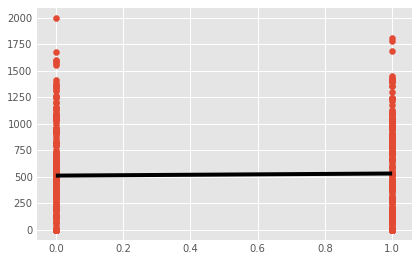

In [293]:
credit["Gender_dummy"] = credit["Gender"].apply(lambda x: 1 if x == "Female" else 0)

X = credit["Gender_dummy"]
X = sm.add_constant(X)
Y = credit["Balance"]

model = sm.OLS(Y,X).fit()
yhat = model.predict(X)

plt.scatter(X["Gender_dummy"],Y)
plt.plot(X["Gender_dummy"], yhat, color="black")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Thu, 04 Jun 2020   Prob (F-statistic):              0.669
Time:                        13:14:29   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          509.8031     33.128     15.389      0.000     444.675     574.931
Gender_dummy    19.7331     46.051      0.429      0.669     -70.801     110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [297]:
''' instead of 1,0 we use 1,-1'''
credit["Gender_dummy"] = credit["Gender"].apply(lambda x: 1 if x == "Female" else -1)

X = credit["Gender_dummy"]
X = sm.add_constant(X)
Y = credit["Balance"]

model = sm.OLS(Y,X).fit()
yhat = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Thu, 04 Jun 2020   Prob (F-statistic):              0.669
Time:                        13:28:44   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          519.6697     23.026     22.569      0.000     474.403     564.937
Gender_dummy     9.8666     23.026      0.429      0.669     -35.400      55.134
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [310]:
credit["White"] = credit["Ethnicity"].apply(lambda x: 1 if x == "Caucasian" else 0)
credit["Asian"] = credit["Ethnicity"].apply(lambda x: 1 if x == "Asian" else 0)

X = credit.loc[:,"White":"Asian"]
X = sm.add_constant(X)
Y = credit["Balance"]

model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Thu, 04 Jun 2020   Prob (F-statistic):              0.957
Time:                        13:42:24   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        531.0000     46.319     11.464      0.000     439.939     622.061
White        -12.5025     56.681     -0.221      0.826    -123.935      98.930
Asian        -18.6863     65.021     -0.287      0.774    -146.515     109.142
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [315]:
X = (ads
     .filter(["TV","radio"])
    )
X["Interaction"] = X["TV"]*X["radio"]
X = sm.add_constant(X)
Y = ads["sales"]

model = sm.OLS(Y,X).fit()
model.summary()

C:\Users\svena\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          6.68e-146
Time:                        14:12:17   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7502      0.248     27.233      0.000       6.261       7.239
TV              0.0191      0.002     12.699      0.000       0.016       0.022
radio           0.0289      0.009      3.241      0.001       0.011       0.046
Interaction     0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Non-linear relationships

In [447]:
auto=pd.read_csv("auto.csv")
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [502]:
index_drops = auto[auto["horsepower"]=='?'].index
auto.drop(index_drops, axis = 0, inplace=True)
auto["horsepower"]= auto["horsepower"].astype(float)

C:\Users\svena\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Text(0.5, 0, 'Fitted values')

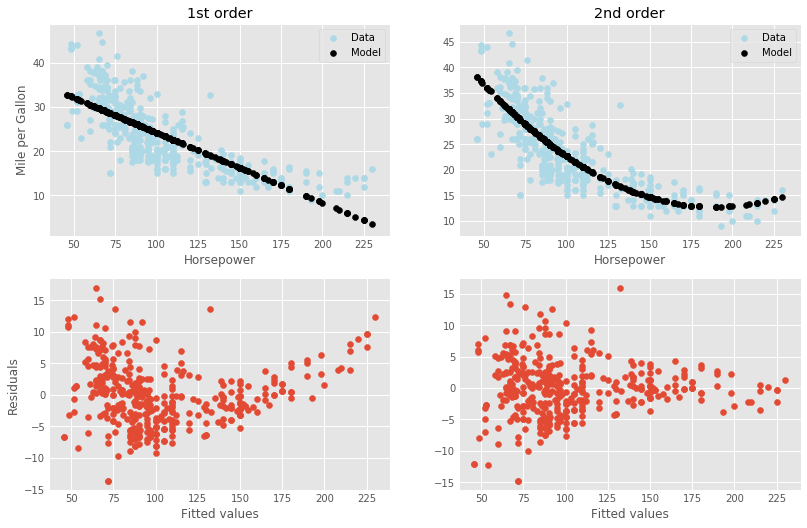

In [504]:
# Get X and create 2nd degree poly
X = (auto.filter(["horsepower"]))
X2 = X.copy()
X2["horsepower2"] = X2["horsepower"]**2

#add constant
X = sm.add_constant(X)
X2 = sm.add_constant(X2)

#get target
Y = auto["mpg"]

#model liner regreesion
model = sm.OLS(Y,X).fit()
yhat = model.predict(X)


#model polynomial regression
model = sm.OLS(Y,X2).fit()
yhat2 = model.predict(X2)

fig, ((ax1, ax2),
      (ax3, ax4)) = plt.subplots(2,2, figsize=(12,8))

ax1.scatter(X["horsepower"],Y, color="lightblue")
ax1.scatter(X["horsepower"],yhat, color="black")
ax1.legend(labels=["Data","Model"])
ax1.set_ylabel("Mile per Gallon")
ax1.set_xlabel("Horsepower")
ax1.set_title("1st order")

ax2.scatter(X["horsepower"],Y, color="lightblue")
ax2.scatter(X["horsepower"],yhat2, color="black")
ax2.legend(labels=["Data","Model"])
ax2.set_xlabel("Horsepower")
ax2.set_title("2nd order")

# residuals of predictions
rss1 = (Y-yhat)
rss2 = (Y-yhat2)

#residuals vs predictions to identify trends that we missed
ax3.scatter(X["horsepower"],rss1)
ax3.set_ylabel("Residuals")
ax3.set_xlabel("Fitted values")

ax4.scatter(X["horsepower"],rss2)
ax4.set_xlabel("Fitted values")

Text(0.5, 0, 'Limit')

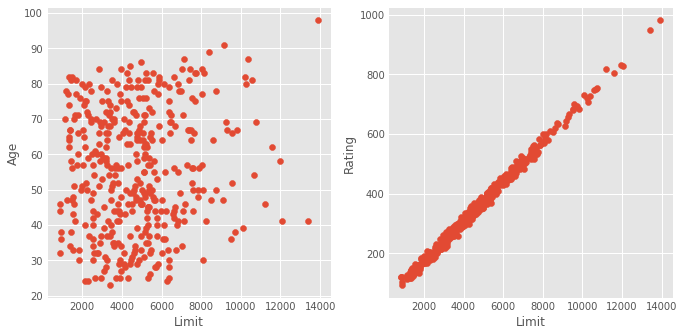

In [513]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.scatter(credit["Limit"],credit["Age"])
ax1.set_ylabel("Age")
ax1.set_xlabel("Limit")

ax2.scatter(credit["Limit"],credit["Rating"])
ax2.set_ylabel("Rating")
ax2.set_xlabel("Limit")

In [567]:
'''calculating the VIF for all quantitative variables'''#
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = credit.drop(["Gender","Student","Married","Ethnicity"], axis=1)
VIF = sm.add_constant(VIF)

res_VIF = [variance_inflation_factor(VIF.values, i) for i in range(VIF.shape[1])]
res_VIF = pd.Series(res_VIF, index= VIF.columns)

print(res_VIF)

const         60.257814
Income         5.555747
Limit        232.629833
Rating       235.632590
Cards          1.445620
Age            1.052225
Education      1.010823
Balance        8.250380
White          1.517909
Asian          1.531887
dtype: float64
